<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Total Fare of Taxi Ride in MachineHack Data Science Championship</h1>
</div>

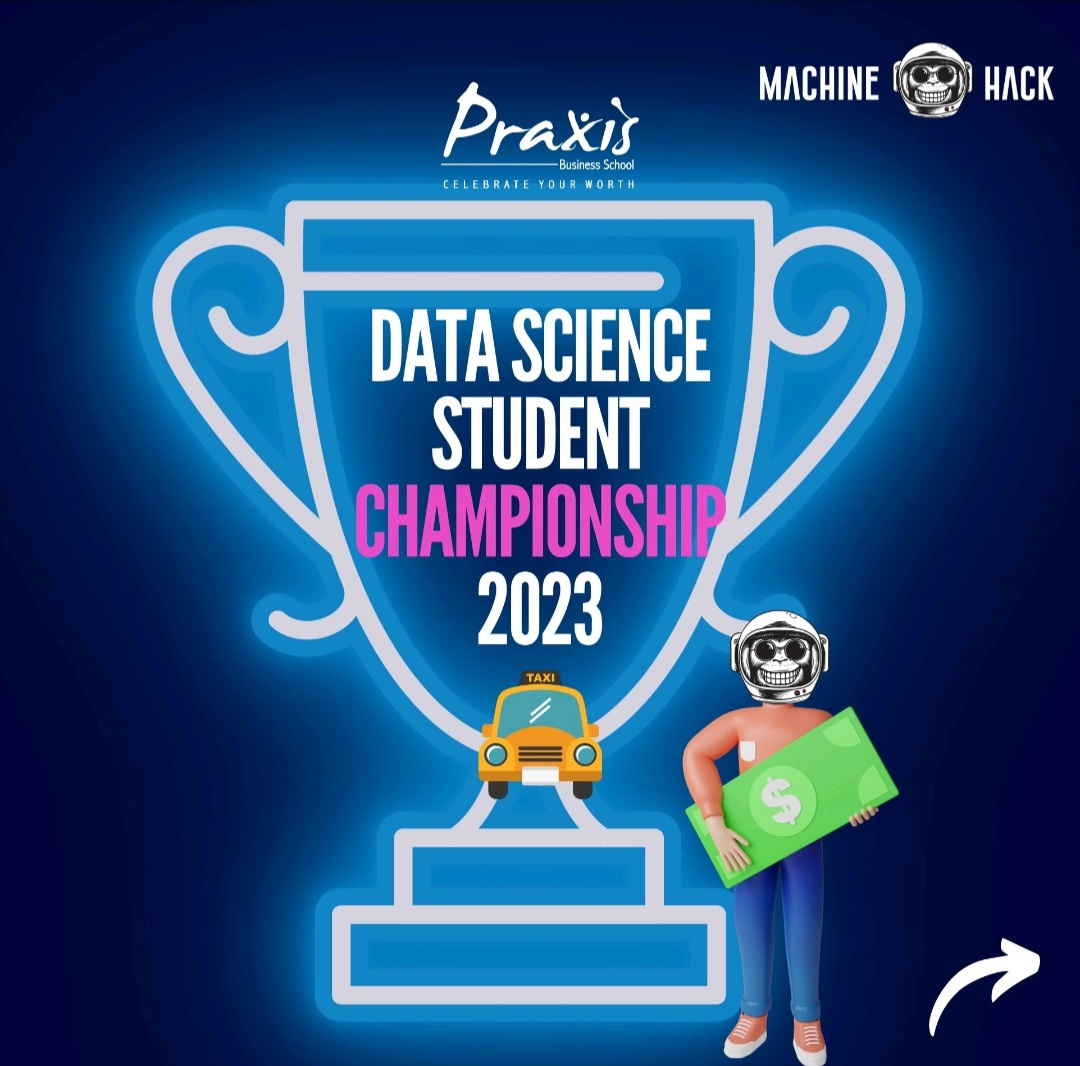

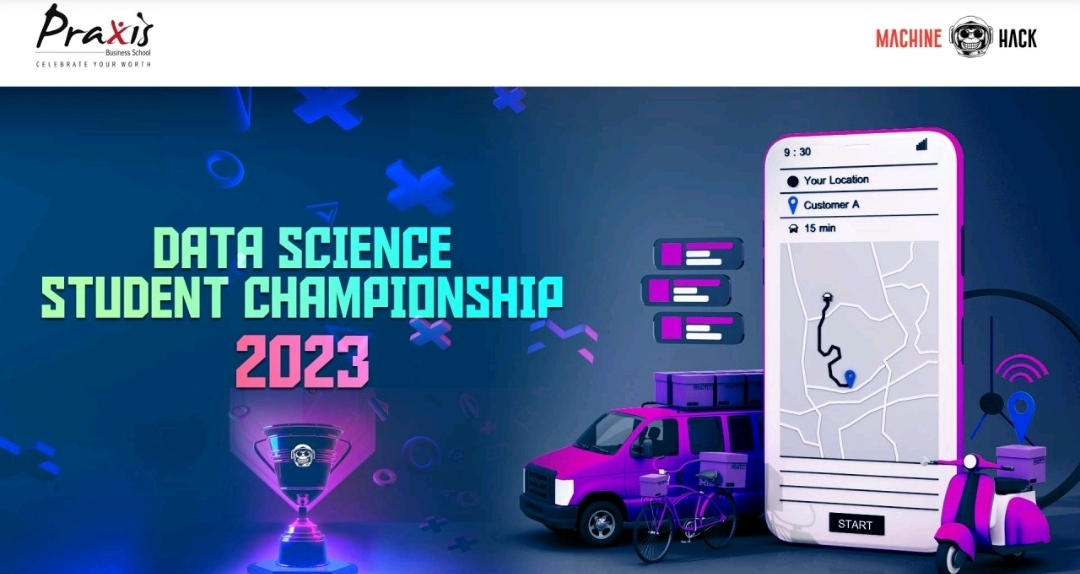

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- MachineHack Data Science Championship (19 May to 11 June 2023)
    
Problem Statement:- Build a machine learning-based approach to predict "Total Fare" of Taxi Ride

# Problem Description

As a student, you've undoubtedly hailed a ride when you're late for class or heading out for a late-night study session. Ever wondered how the total cost of your ride is determined? Well, it's time to switch gears from passenger to predictor. In this thrilling hackathon, you'll put your data science skills to the ultimate test by predicting the total fare of a ride-hailing trip. 🎯 🚖 🛠️💼📚:

# Data Description

## Target

a) fare:- Identify the input features in the dataset and use them to predict the "fare" of a trip.

b) total_fare:- Once the "fare" is predicted, then calculate "toatl_fare" using other inputs. (like fare, tip & miscellaneous_fees)

<b> Input features </b>

⏱️ 'trip_duration': How long did the journey last?

🛣️ 'distance_traveled':- How far did the taxi travel?

🧑‍🤝‍🧑 'num_of_passengers':- How many passengers were in the taxi?

💵 'fare':- What's the base fare for the journey?

💲 'tip':- How much did the driver receive in tips?

🎀 'miscellaneous_fees':- Were there any additional charges during the trip?

💰 'total_fare':- The grand total for the ride (this is your prediction target!)

⚡ 'surge_applied':- Was there a surge pricing applied? Yes or no?

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [3]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.titlesize'] = 14
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

#handle unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#no constraint on the data columns to be displayed in jupyter notebook
pd.options.display.max_columns = None

# Handle Date & Time
from datetime import datetime

# Handle zip files
import zipfile

# Print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

CatBoost version 1.1.1
NumPy version 1.20.1
Pandas version 1.2.4
seaborn version 0.11.1
sklearn version 0.24.1
xgboost version 1.7.1
lightgbm version 3.3.3


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Handle "Zip" File
- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [4]:
with zipfile.ZipFile(r'C:\Users\abarphe\Favorites\MH\DSSC-May23\Participants_Data_DSSC_2023.zip', 'r') as zip_ref:
    zip_ref.extractall('DSSC-May23')
    zip_ref.close()

train = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\DSSC-May23\train.csv')
test = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\DSSC-May23\test.csv')
test1 = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\DSSC-May23\test.csv')
submission = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\DSSC-May23\submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset
- Preprocessing of Train Dataset 
- Preprocessing of Test Dataset

In [5]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB
None 

Shape of Train Data:-

(209673, 8) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Test Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column  

In [6]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0   

---------------------------------------------------------------------------------------------------------------------

About Test Data:-

   trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0         1076.0               4.18   

In [7]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

        trip_duration  distance_traveled  num_of_passengers    fare  tip  \
209668         1617.0               8.42                1.0  150.00   47   
209669          438.0               1.29                1.0   48.75   12   
209670          571.0               2.82                1.0   63.75    0   
209671          491.0               2.16                1.0   56.25    0   
209672         3614.0              33.72                1.0  337.50    0   

        miscellaneous_fees  total_fare  surge_applied  
209668               5.800     202.800              0  
209669              34.575      95.325              1  
209670               6.000      69.750              0  
209671              13.500      69.750              0  
209672               2.250     339.750              0   

---------------------------------------------------------------------------------------------------------------------

About Test Data:-

       trip_duration  distance_traveled  num_of

In [8]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [9]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.0,89861.000000,89861.000000,89861.0,89861.000000
mean,1148.178164,7.263529,1.286732,0.0,13.031048,15.190636,0.0,0.282280
std,4611.480867,554.965869,0.920910,0.0,18.692751,12.677904,0.0,0.450112
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,9.000000,0.0,719.000000,431.500000,0.0,1.000000


In [10]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
print(missing_val_train)

Checking Null entries & their Percentage in Train Data:-


                    Missing Values  Percentage Missing Values
trip_duration                    0                        0.0
distance_traveled                0                        0.0
num_of_passengers                0                        0.0
fare                             0                        0.0
tip                              0                        0.0
miscellaneous_fees               0                        0.0
total_fare                       0                        0.0
surge_applied                    0                        0.0


In [11]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
trip_duration,0,0.0
distance_traveled,0,0.0
num_of_passengers,0,0.0
fare,0,0.0
tip,0,0.0
miscellaneous_fees,0,0.0
total_fare,0,0.0
surge_applied,0,0.0


In [12]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col, train[col].nunique(), train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,trip_duration,5907,"[748.0, 1187.0, 730.0, 671.0, 329.0, 355.0, 45..."
1,distance_traveled,2463,"[2.75, 3.43, 3.12, 5.63, 2.09, 1.74, 2.22, 5.2..."
2,num_of_passengers,10,"[1.0, 3.0, 2.0, 0.0, 6.0, 5.0, 4.0, 8.0, 7.0, ..."
3,fare,631,"[75.0, 105.0, 71.25, 90.0, 45.0, 52.5, 116.25,..."
4,tip,262,"[24, 0, 12, 36, 29, 15, 17, 14, 9, 8, 26, 11, ..."
5,miscellaneous_fees,1674,"[6.299999999999997, 13.200000000000015, 26.625..."
6,total_fare,3742,"[105.3, 142.20000000000002, 97.875, 99.75, 70...."
7,surge_applied,2,"[0, 1]"


In [13]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col, test[col].nunique(), test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,trip_duration,4400,"[1076.0, 429.0, 856.0, 622.0, 507.0, 933.0, 26..."
1,distance_traveled,2062,"[4.18, 1.48, 4.15, 3.22, 3.98, 9.01, 1.0, 3.03..."
2,num_of_passengers,10,"[1.0, 4.0, 2.0, 5.0, 3.0, 6.0, 0.0, 7.0, 8.0, ..."
3,fare,1,[0]
4,tip,193,"[0, 24, 15, 10, 17, 26, 62, 38, 13, 120, 8, 12..."
5,miscellaneous_fees,1241,"[13.5, 6.0, 5.625, 2.25, 26.625, 5.89999999999..."
6,total_fare,1,[0]
7,surge_applied,2,"[0, 1]"


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [14]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64','float64']).columns
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

Numerical Columns in Train Data are :-


Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------------


In [15]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "trip_duration" :11899

Lower Limit in "trip_duration" : -532.0

Upper Limit in "trip_duration" : 2076.0

Inter Quartile Range of "trip_duration" : 652.0 


Number of outliers in "distance_traveled" :16894

Lower Limit in "distance_traveled" : -3.7199999999999998

Upper Limit in "distance_traveled" : 11.4

Inter Quartile Range of "distance_traveled" : 3.7800000000000002 


Number of outliers in "num_of_passengers" :30444

Lower Limit in "num_of_passengers" : 1.0

Upper Limit in "num_of_passengers" : 1.0

Inter Quartile Range of "num_of_passengers" : 0.0 


Number of outliers in "fare" :13623

Lower Limit in "fare" : -43.125

Upper Limit in "fare" : 211.875

Inter Quartile Range of "fare" : 63.75 


Number of outliers in "tip" :6770

Lower Limit in "tip" : -30.0

Upper Limit in "tip" : 50.0

Inter Quartile Range of "tip" : 20.0 


Number of outliers in "miscellaneous_fees" :2159

Lower Limit in "miscellaneous_fees" : -24.675000000000026

Upper Limit in "miscellane

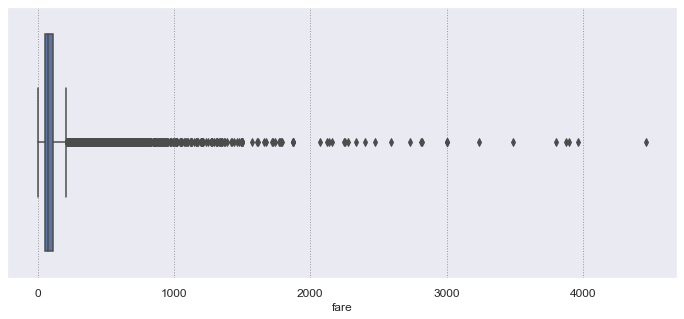

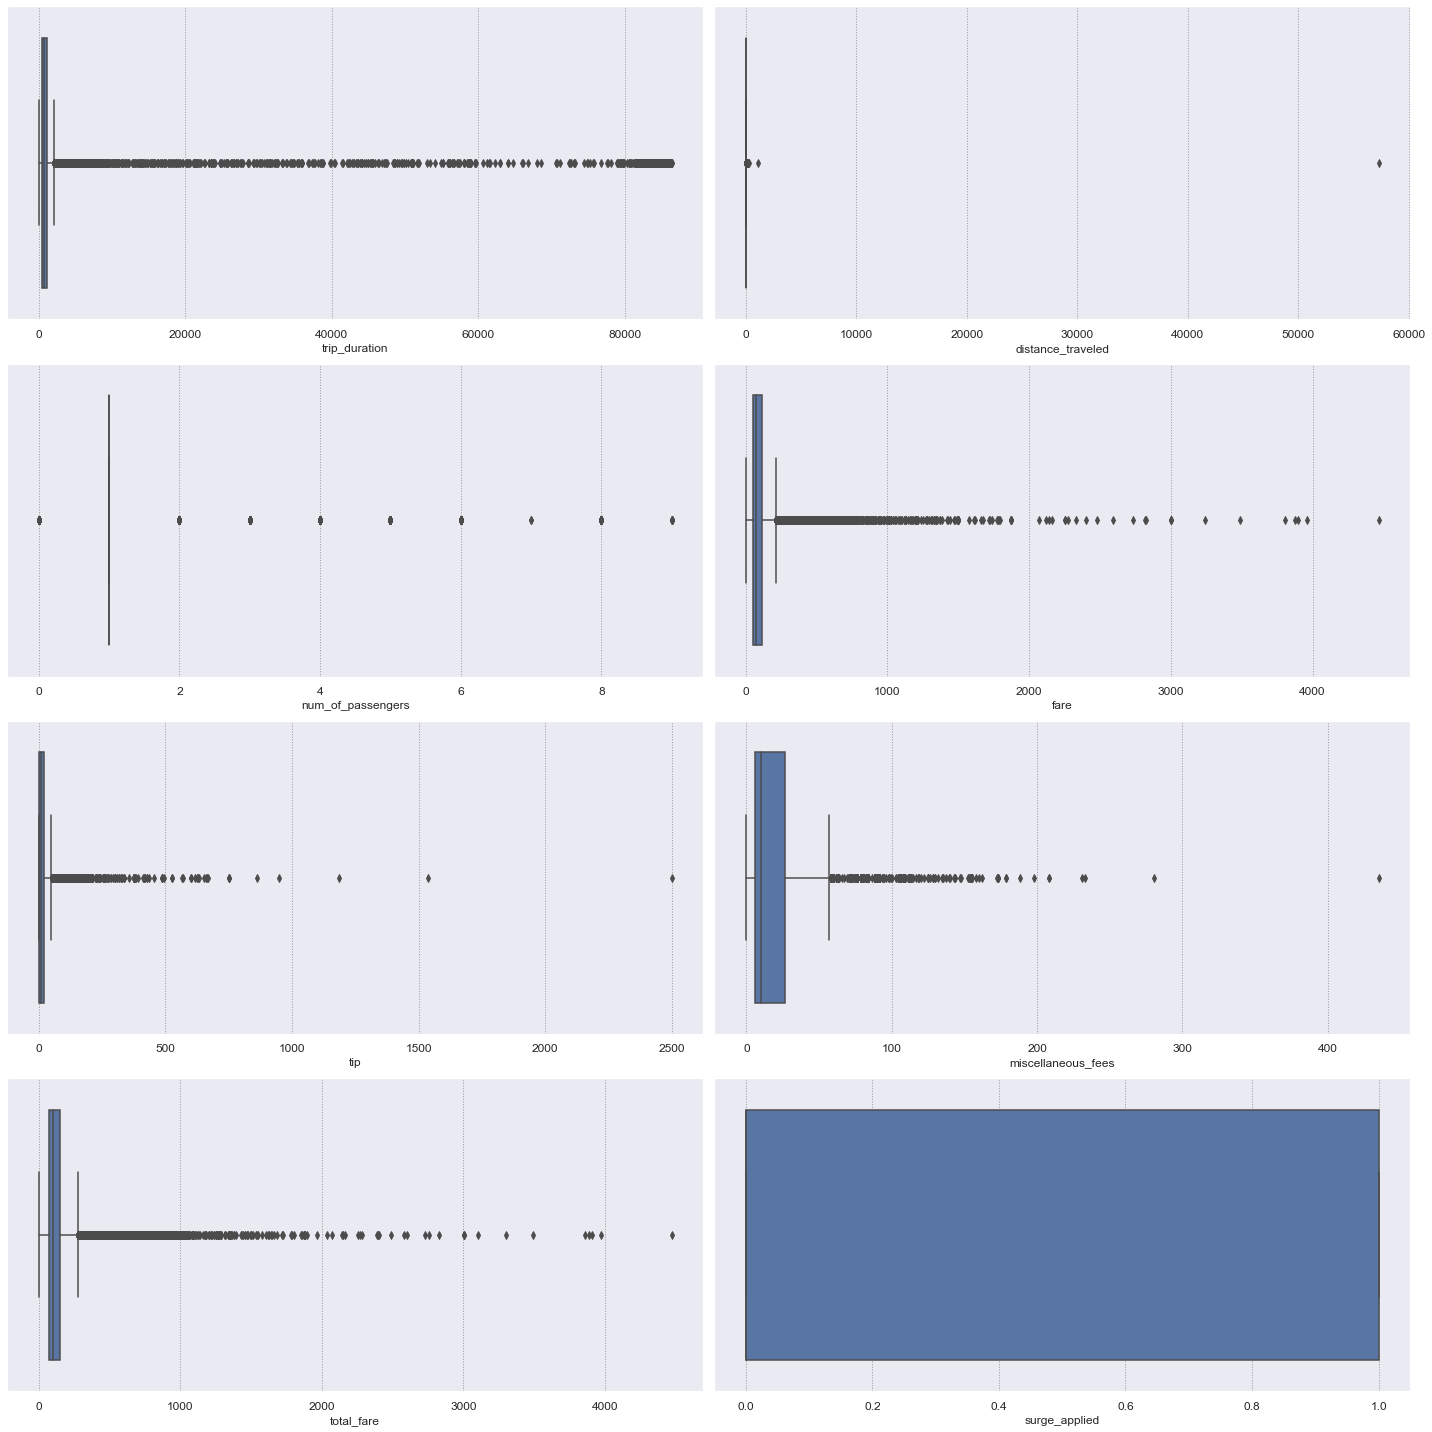

In [17]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(train['fare']);

# Independent Numerical Variable
Create_BoxPlotS(train,num_cols_train,4,2)

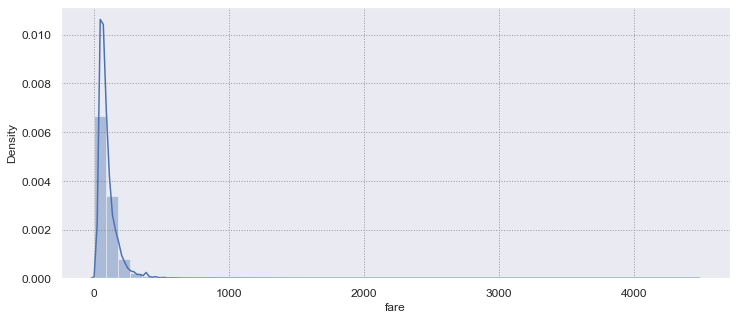

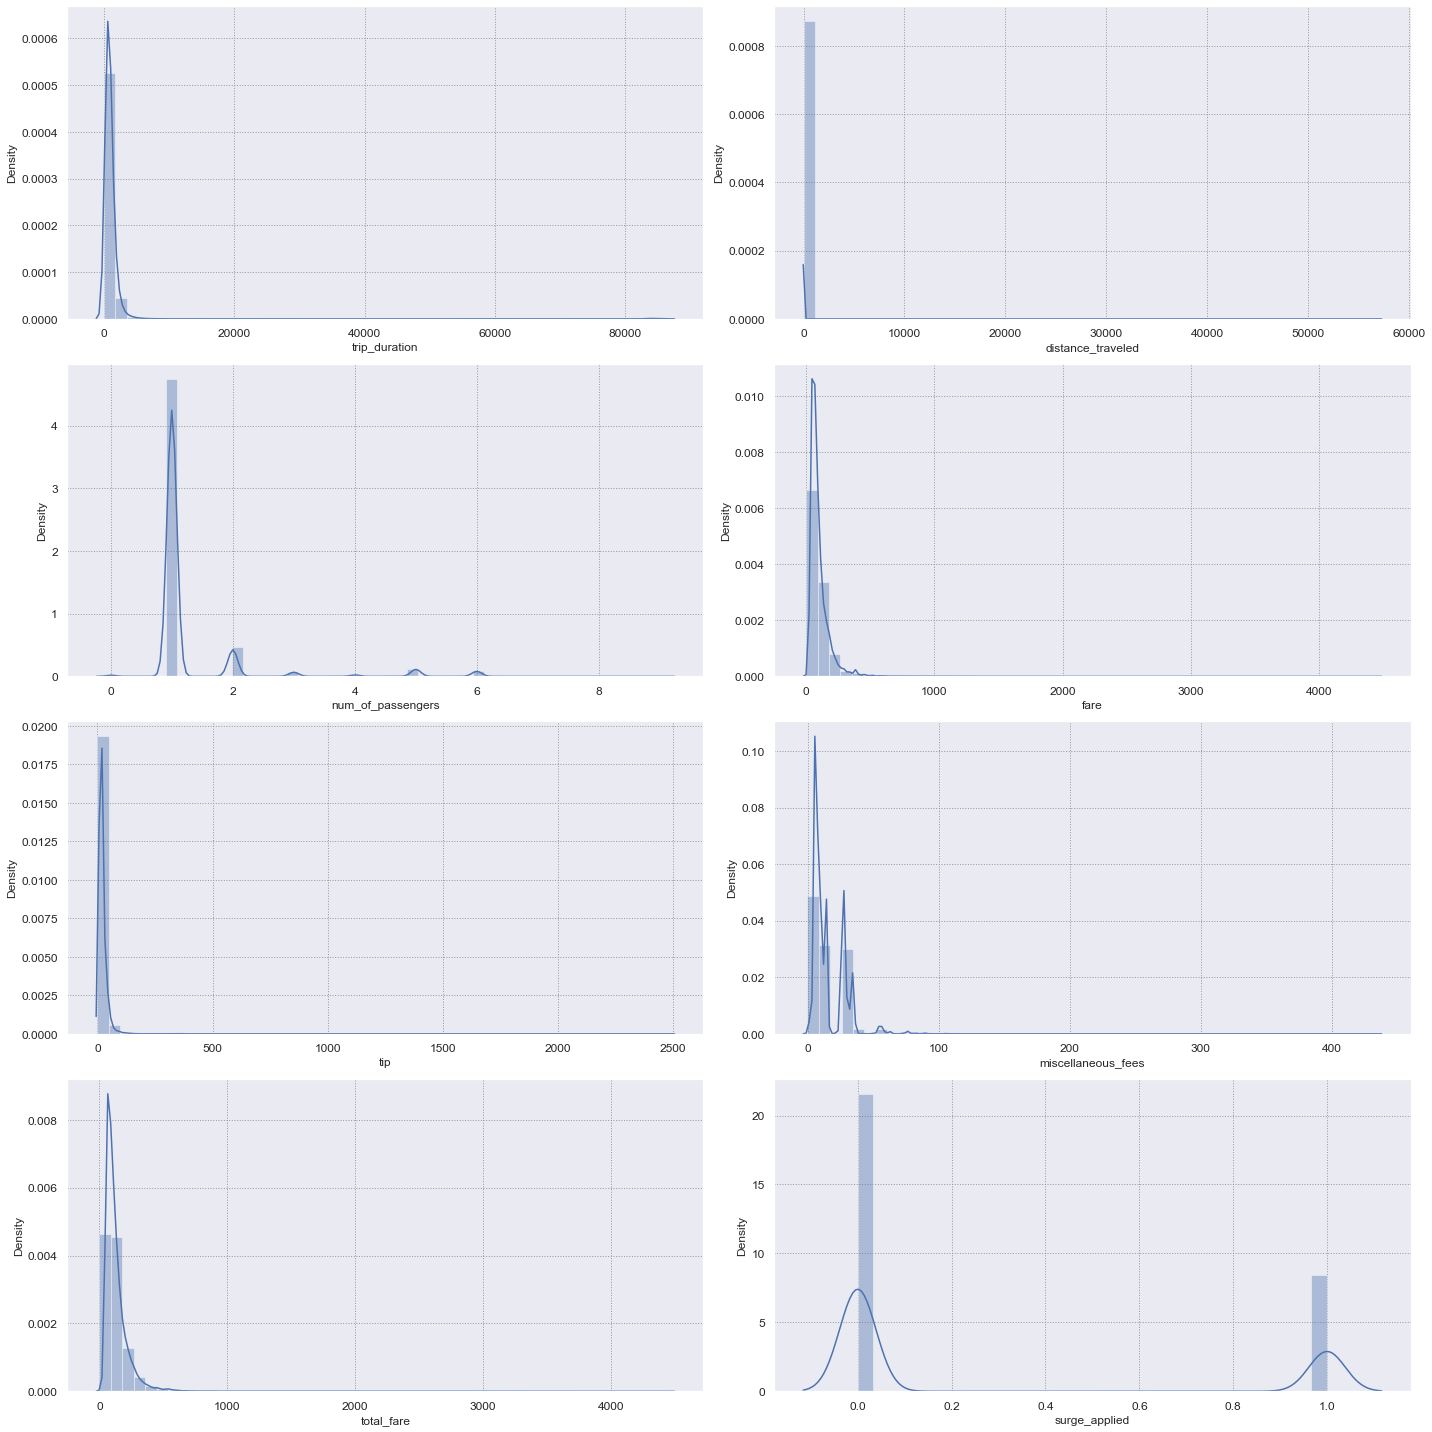

In [18]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(train['fare']);

# Independent Numerical Variable
Create_DistPlots(train,num_cols_train,4,2)

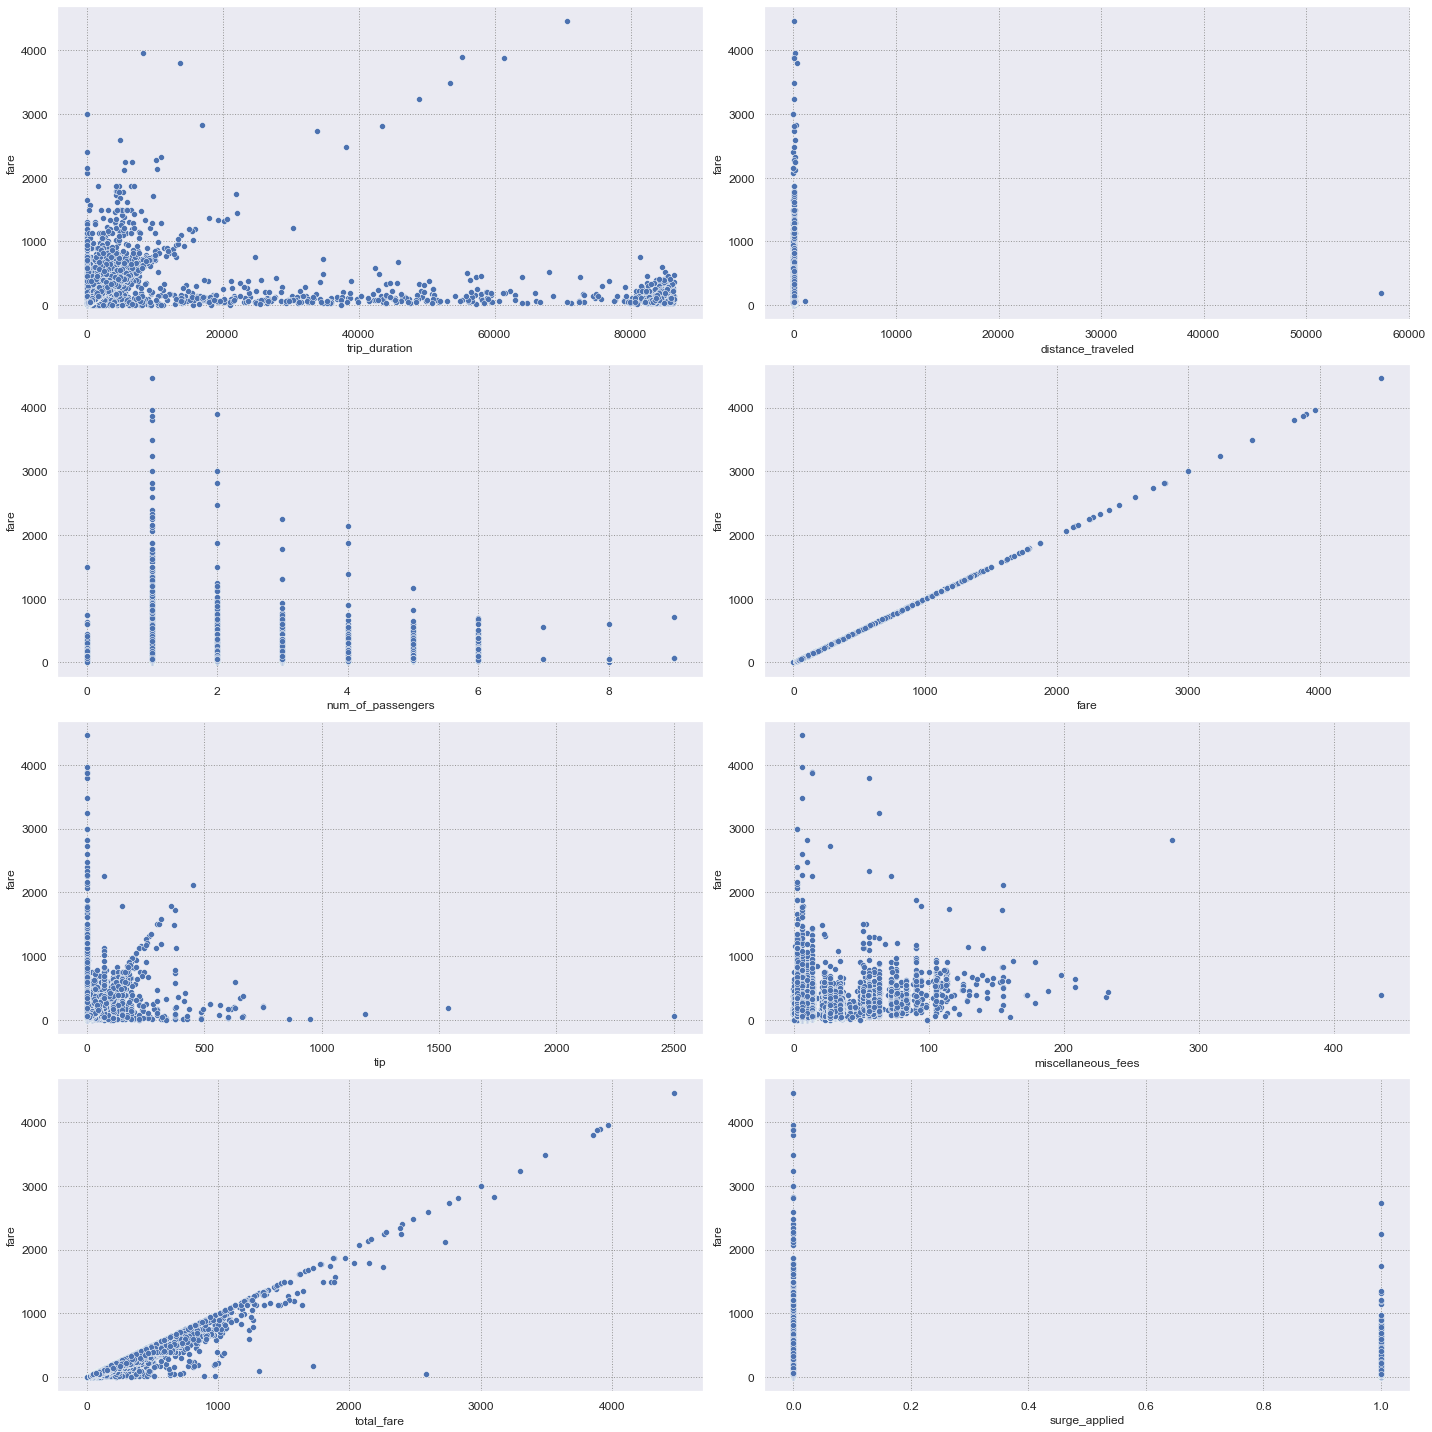

In [19]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'fare',4,2)

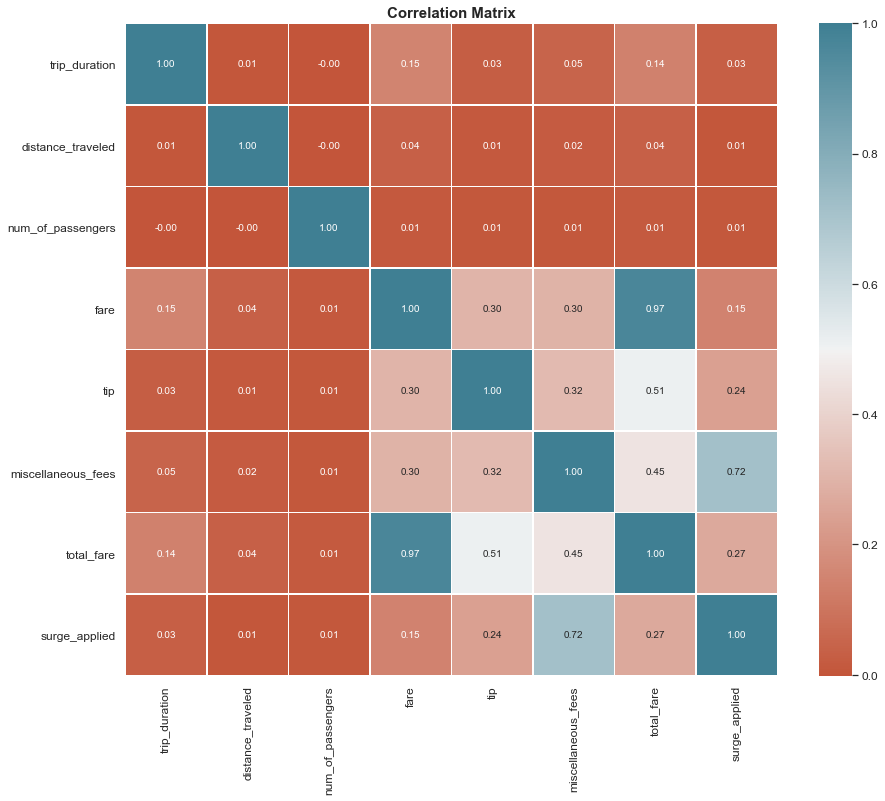

In [20]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

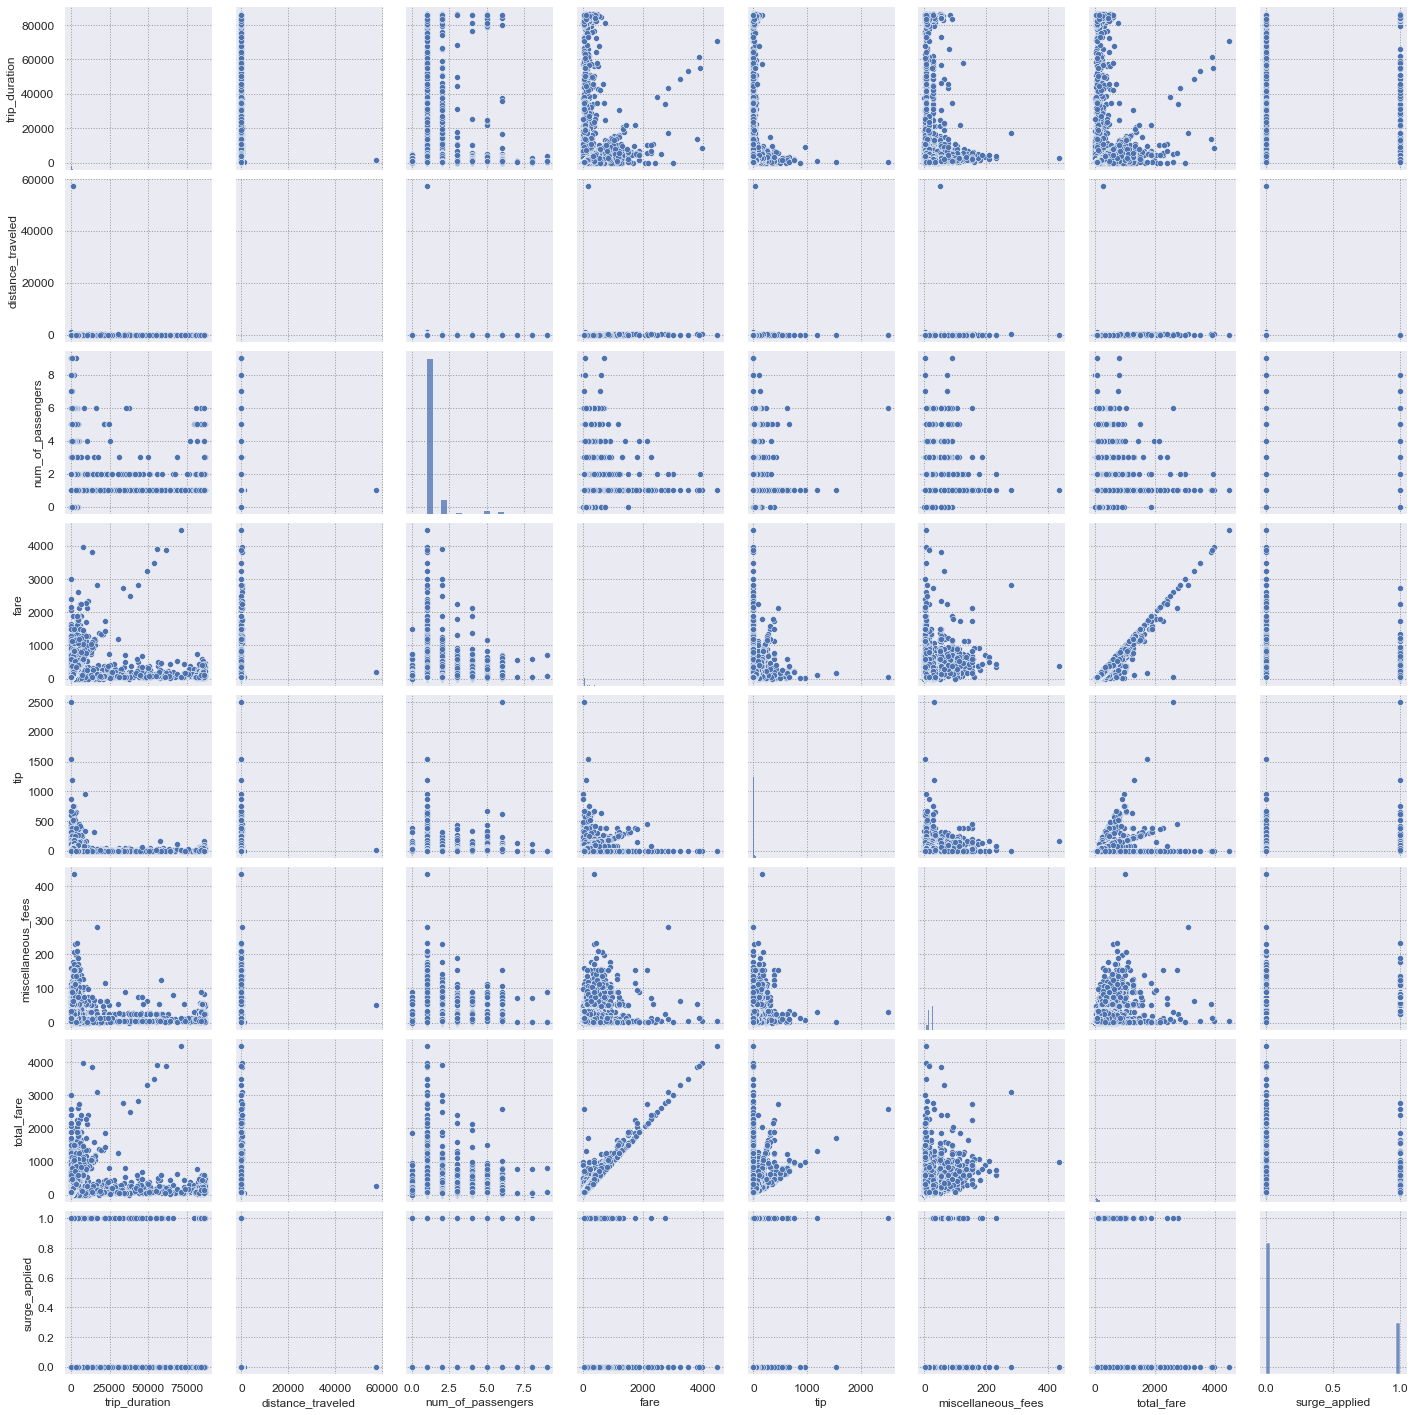

In [21]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [22]:
train.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [23]:
test.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [24]:
drop_columns = ['tip', 'miscellaneous_fees', 'total_fare']

train = train.drop(drop_columns,axis=1)
print('-------------'*9)
test = test.drop(drop_columns,axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_duration      209673 non-null  float64
 1   distance_traveled  209673 non-null  float64
 2   num_of_passengers  209673 non-null  float64
 3   fare               209673 non-null  float64
 4   surge_applied      209673 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 8.0 MB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_duration      89861 non-null  float64
 1   distance_traveled  89861 non-null  float64
 2   num_of_passengers  89861 non-null  float64
 3   fare               89861 non-null  int64  
 4   surge_applied      89861 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 3.4 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [27]:
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)
print("Length of Original Data:-"
      ,len(train),"\nLength of Train Data:-"
      ,len(train_temp)
      ,"\nLength of Test Data:-"
      ,len(test_temp))

features=list(train.columns)
label='fare'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

test = test.drop(['fare'],axis=1) 

Length of Original Data:- 209673 
Length of Train Data:- 207576 
Length of Test Data:- 2097
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['trip_duration', 'distance_traveled', 'num_of_passengers', 'surge_applied']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- fare
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Linear Regression</h2>
</div>

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train) 
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Ridge Regression</h2>
</div>

In [ ]:
model2 = Ridge(random_state = 0)
model2.fit(X_train,y_train) 
print('Accuracy of Ridge Regression on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Ridge Regression on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Lasso Regression</h2>
</div>

In [ ]:
model3 = Lasso(random_state = 0)
model3.fit(X_train,y_train) 
print('Accuracy of Lasso Regression on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Lasso Regression on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Elastic Net</h2>
</div>

In [ ]:
model4 = ElasticNet() 
model4.fit(X_train,y_train) 
print('Accuracy of Elastic Net on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Elastic Net on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Decision Tree Regressor</h2>
</div>

In [ ]:
model5 = DecisionTreeRegressor(random_state=0)
model5.fit(X_train,y_train) 
print('Accuracy of Decision Tree Regressor on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of Decision Tree Regressor on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Fitting Decision Tree Regressor Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [ ]:
model6 = DecisionTreeRegressor(random_state=42,max_depth = 5
                               ,max_features = 'auto',max_leaf_nodes =  None
                               ,min_samples_leaf = 1
                               ,min_weight_fraction_leaf = 0.1
                               ,splitter = 'best')

model6.fit(X_train,y_train) 
print('Accuracy of Decision Tree Regressor on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))
print('Accuracy of Decision Tree Regressor on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [ ]:
model7 = LGBMRegressor(random_state = 0)
model7.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))
print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Fitting LGBM Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [ ]:
model8 = LGBMRegressor(colsample_bytree=0.7
                       ,learning_rate=0.06579332246575682
                       ,random_state = 0)

model8.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))
print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- XGB Regressor</h2>
</div>

In [ ]:
model9 = XGBRegressor(random_state = 0)
model9.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))
print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Fitting XGB Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [ ]:
model10 = XGBRegressor(base_score=0.5,booster='gbtree',callbacks=None
                        ,colsample_bylevel=1,colsample_bynode=1
                        ,colsample_bytree=1,early_stopping_rounds=None
                        ,enable_categorical=False,eval_metric=None
                        ,feature_types=None,gamma=0,gpu_id=-1
                        ,grow_policy='depthwise',importance_type=None
                        ,interaction_constraints='',learning_rate=0.05,max_bin=256
                        ,max_cat_threshold=64,max_cat_to_onehot=4,max_delta_step=0
                        ,max_depth=5,max_leaves=0,min_child_weight=1
                        ,monotone_constraints='()',n_estimators=300,n_jobs=0
                        ,num_parallel_tree=1,predictor='auto'
                        ,random_state=0)

model10.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))
print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Histogram Gradient Boosting Regression</h2>
</div>

In [ ]:
model11 = HistGradientBoostingRegressor(random_state=500)
model11.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))
print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Fitting Histogram Gradient Boosting Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [ ]:
model12 = HistGradientBoostingRegressor(random_state=500
                                        ,learning_rate=0.5
                                        ,max_depth=10
                                        ,max_bins=255)
model12.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))
print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Random Forest Regressor</h2>
</div>

In [ ]:
model13 = RandomForestRegressor(random_state = 0)
model13.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))
print('Accuracy of Random Forest Regressor on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Fitting Random Forest Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [ ]:
model14 = RandomForestRegressor(random_state = 100, n_estimators = 1000
                                ,min_samples_split = 10,min_samples_leaf = 2
                                ,max_features = 'sqrt', max_depth = 10
                                ,bootstrap = True)
model14.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))
print('Accuracy of Random Forest Regressor on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Cat Boost Regressor</h2>
</div>

In [ ]:
model15 = CatBoostRegressor(random_state = 0)
model15.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))
print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Fitting Cat Boost Regressor Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [ ]:
model16 = CatBoostRegressor(random_state = 42,depth = 2
                            ,iterations = 100,l2_leaf_reg = 0.2
                            ,learning_rate = 0.03)
model16.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))
print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Multi Layer Perceptron Regression</h2>
</div>

In [ ]:
model17 = MLPRegressor(hidden_layer_sizes=(100,50,10),
                       max_iter = 100,activation = 'tanh',
                       solver = 'adam'
                      , learning_rate ='constant'
                       , alpha = 0.00001 )

model17.fit(X_train,y_train) 
print('Accuracy of Multi Layer Perceptron Regressor on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))
print('Accuracy of Multi Layer Perceptron Regressor on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Gradient Boosting Regressor</h2>
</div>

In [ ]:
model18 = GradientBoostingRegressor(random_state = 0)
model18.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))
print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- Fitting Gradient Boosting Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [ ]:
model19 = GradientBoostingRegressor(random_state = 0
                                    ,learning_rate=0.08697490026177834
                                    ,max_features=0.6)
model19.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model19.score(X_train, y_train)))
print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model19.score(X_test, y_test)))
print('-------------'*9)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [ ]:
# Import Test data for the prediction of the Target_Variable1 (i.e.fare)
x = np.array(test)

# Prediction of Target_Variable1 using Model1 (Linear Regression)
y_pred1 = model1.predict(x) #Public Score('total_fare' Prediction):- 0.47813

# Prediction of Target_Variable1 using Model2 (Ridge Regression)
y_pred2 = model2.predict(x) #Public Score('total_fare' Prediction):-0.47813   

# Prediction of Target_Variable1 using Model3  (Lasso Regression)
y_pred3 = model3.predict(x) #Public Score('total_fare' Prediction):- 0.48089

# Prediction of Target_Variable1 using Model4 (ElasticNet)
y_pred4 = model4.predict(x) #Public Score('total_fare' Prediction):-0.49163 

# Prediction of Target_Variable1 using Model5 (Decision Tree Regressor)
y_pred5 = model5.predict(x) #Public Score('total_fare' Prediction):-0.24286

# Prediction of Target_Variable1 using Model6 (Decision Tree Regressor Best HyperParameter)
y_pred6 = model6.predict(x) #Public Score('total_fare' Prediction):-0.24878

# Prediction of Target_Variable1 using Model7 (LGBM Regressor)
y_pred7 = model7.predict(x) #Public Score('total_fare' Prediction):-0.20176 

# Prediction of Target_Variable1 using Model8 (LGBM Regressor Best HyperParameter)
y_pred8 = model8.predict(x) #Public Score('total_fare' Prediction):-0.20187

# Prediction of Target_Variable1 using Model9 (XGB Regressor)
y_pred9 = model9.predict(x) #Public Score('total_fare' Prediction):-0.20094 

# Prediction of Target_Variable1 using Model10 (XGB Regressor Best HyperParameter)
y_pred10 = model10.predict(x) #Public Score('total_fare' Prediction):-0.19956

# Prediction of Target_Variable1 using Model11 (Histogram Gradient Boosting Regression)
y_pred11 = model11.predict(x) #Public Score('total_fare' Prediction):-0.20099 

# Prediction of Target_Variable1 using Model12  (Model11 with Best HyperParameter)
y_pred12 = model12.predict(x) #Public Score('total_fare' Prediction):-0.20129

# Prediction of Target_Variable1 using Model13 (Random Forest Regressor)
y_pred13 = model13.predict(x) #Public Score('total_fare' Prediction):-0.21577 

# Prediction of Target_Variable1 using Model14  (Random Forest Regressor Best HyperParameter)
y_pred14 = model14.predict(x) #Public Score('total_fare' Prediction):-0.19866

# Prediction of Target_Variable1 using Model15 (CatBoost Regressor)
y_pred15 = model15.predict(x) #Public Score('total_fare' Prediction):-0.20274  

# Prediction of Target_Variable1 using Model16  (CatBoost Regressor Best HyperParameter)
y_pred16 = model16.predict(x) #Public Score('total_fare' Prediction):-0.24047 

# Prediction of Target_Variable1 using Model17 (Multi Layer Perceptron Regressor)
y_pred17 = model17.predict(x) #Public Score('total_fare' Prediction):-0.21442 

# Prediction of Target_Variable1 using Model18 (Gradient Boosting Regressor)
y_pred18 = model18.predict(x) #Public Score('total_fare' Prediction):-0.20244

# Prediction of Target_Variable1 using Model19 (Gradient Boosting Regressor Best HyperParameter)
y_pred19 = model19.predict(x) #Public Score('total_fare' Prediction):-0.20354

In [ ]:
# Final Prediction Target_Variable2 (total_fare) using Forecasted value of "fare"

y_pred_a = (0.1*y_pred6 + 0.9*y_pred14) 
y_pred_b = (0.05*y_pred10 + 0.95*y_pred14)
y_pred_c = (0.95*y_pred9 + 0.05*y_pred16) 
y_pred_d = (0.1*y_pred7 + 0.9*y_pred10) 

y_pred = (0.48*y_pred_a + 0.02*y_pred_b + 0.45*y_pred_c + 0.05*y_pred_d) #0.19806

test['fare'] = y_pred
test.loc[test1['fare'] < 0.0, ['fare']] = 0.0
test['total_fare'] = test['fare'] + test1['tip'] + test1['miscellaneous_fees']
test.loc[test['total_fare'] < 0.0, ['total_fare']] = 0.0
test['total_fare'].to_csv('C:\Users\abarphe\Favorites\MH\DSSC-May23\Final_Predication_Aniiket_Barphe.csv', index=False)
print('Final File Submitted!')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:-**

**1) Private Leaderboard :-** 0.20949

**2) Public Leaderboard :-** 0.19806

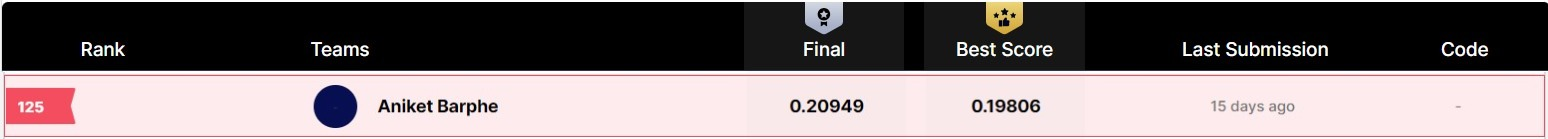

**Competition Link:-** https://machinehack.com/hackathons/data_science_student_championship_2023/leaderboard

**Rank Scored:-**

a) **125** out of **813** registered participants (Private Leaderboard)